In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
def calculate_sole_b_uncertainty(series, u_b, u_be=0):
    return np.sqrt(series/series*((u_b**2)/3 + (u_be**2)/3)) #returns a number


In [18]:
cell = pd.DataFrame(
    {
        'U1':#V
        [
            0.2,
            0.4,
            0.6,
            0.8,
            1,
            1.2,
            1.3,
            1.35,
            1.4,
            1.45,
            1.5,
            1.55,
            1.6,
            1.65,
            1.7,
            1.75,
            1.8,
            1.85,
            1.9,
            1.95,
            2,
            2.05,
            2.10,
            2.15,
            2.2,

        ],
        'U2':#V
        [
            0.238,
            0.409,
            0.597,
            0.798,
            0.990,
            1.194,
            1.29,
            1.34,
            1.388,
            1.437,
            1.49,
            1.533,
            1.577,
            1.619,
            1.664,
            1.711,
            1.754,
            1.796,
            1.837,
            1.881,
            1.917,
            1.958,
            1.995,
            2.022,
            2.060,
        ],
        'I':#mA
        [
            0.45,
            1.15,
            1.55,
            2,
            3.5,
            6.69,
            8.15,
            7.4,
            6,
            8.5,
            10.2,
            15.1,
            21.37,
            26.72,
            32.32,
            37.8,
            44.4,
            51.4,
            59.2,
            68.2,
            77.6,
            88.6,
            101.4,
            118.5,
            139.5,
        ]
    }
)

cell.to_csv('in/Hcell.csv', index=False, sep='\t')
cell

,U1,U2,I
0,0.20,0.238,0.45
1,0.40,0.409,1.15
2,0.60,0.597,1.55
3,0.80,0.798,2.00
4,1.00,0.990,3.50
5,1.20,1.194,6.69
6,1.30,1.290,8.15
7,1.35,1.340,7.40
8,1.40,1.388,6.00
9,1.45,1.437,8.50


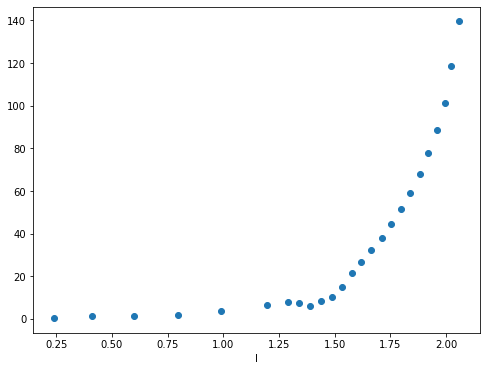

In [19]:
plt.figure(figsize=(8,6))

plt.scatter(cell['U2'], cell['I'])

plt.xlabel(r'U')
plt.xlabel(r'I')

plt.show()

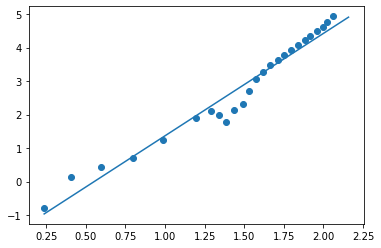

In [20]:

plt.scatter(cell['U2'], np.log(cell['I']))
cell['logI'] = np.log(cell['I'])
fit = np.polyfit(cell['U2'], cell['logI'], 1)
x_fit = np.arange(cell['U2'].min(), cell['U2'].max() + 0.1, 0.01)

y_log_fit = fit[1] + x_fit*fit[0]
plt.plot(x_fit,y_log_fit)

y_fit = np.exp(y_log_fit)

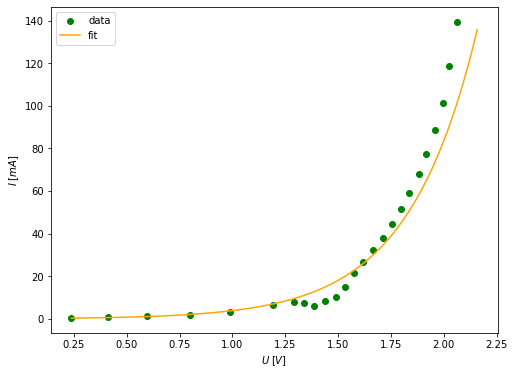

In [21]:

plt.figure(figsize=(8,6))

plt.scatter(cell['U2'], cell['I'], color = 'green', label = 'data')
plt.plot(x_fit,y_fit, color = 'orange', label = 'fit')

plt.xlabel(r'$U \; [V]$')
plt.ylabel(r'$I \; [mA]$')

plt.legend()
plt.savefig('out/wyk_I_od_U.jpg', dpi = 350)
plt.show()

In [22]:
fuel = pd.DataFrame({
    'O2': #mL
    [
        10,
        15,
        20,
        25,
        30,
        35,
        40,
    ],
    'H2': #mL
    [
        15,
        20,
        30,
        40,
        50,
        60,
        70,
    ],
    'U': #V
    [
        2.119,
        2.093,
        2.078,
        2.068,
        2.058,
        2.051,
        2.046,
    ],
    'I': #mA
    [ 
        137.3,
        221.4,
        234.8,
        244.8,
        253.1,
        259.3,
        264.2,
    ],
})

fuel['u_O2'] = calculate_sole_b_uncertainty(fuel['O2'], 5, 5/2)
fuel['u_H2'] = calculate_sole_b_uncertainty(fuel['H2'], 5, 5/2)

fuel.to_csv('in/fuel.csv', index=False, sep='\t')
fuel

,O2,H2,U,I,u_O2,u_H2
0,10,15,2.119,137.3,3.227486,3.227486
1,15,20,2.093,221.4,3.227486,3.227486
2,20,30,2.078,234.8,3.227486,3.227486
3,25,40,2.068,244.8,3.227486,3.227486
4,30,50,2.058,253.1,3.227486,3.227486
5,35,60,2.051,259.3,3.227486,3.227486
6,40,70,2.046,264.2,3.227486,3.227486


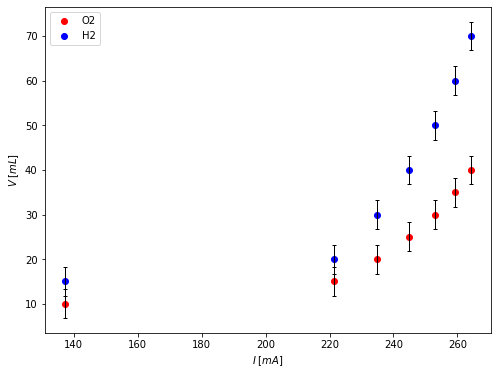

In [23]:

plt.figure(figsize=(8,6))

plt.scatter(fuel['I'],fuel['O2'], color = 'red', label = 'O2')
plt.errorbar(fuel['I'],fuel['O2'],yerr=fuel['u_O2'], ecolor='black', elinewidth=1, capsize=2, capthick=1, fmt='None')

plt.scatter(fuel['I'],fuel['H2'], color = 'blue', label = 'H2')
plt.errorbar(fuel['I'],fuel['H2'],yerr=fuel['u_H2'], ecolor='black', elinewidth=1, capsize=2, capthick=1, fmt='None')

plt.xlabel(r'$I \; [mA]$')
plt.ylabel(r'$V \; [mL]$')

plt.legend()
plt.savefig('out/wyk_V_od_I.jpg', dpi=350)
plt.show()